<a href="https://colab.research.google.com/github/banana-palm/Intro-to-Java-Programming/blob/master/DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [2]:
zip_file_path = 'Post-hurricane1.zip'
# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()

print("Zip file extracted successfully.")


Zip file extracted successfully.


In [3]:
folder_path = 'Post-hurricane1'
# Initialize lists to store images and labels
images = []
labels = []

# Iterate over the subfolders ('damage' and 'no_damage')
for subfolder in ['damage', 'no_damage']:
    subfolder_path = os.path.join(folder_path,subfolder)
    # Iterate over each file in the subfolder
    for filename in os.listdir(subfolder_path):
        if filename.endswith('.jpg') or filename.endswith('.jpeg'):
            # Load the image using PIL
            image_path = os.path.join(subfolder_path, filename)
            image = Image.open(image_path)
            image = image.resize((128, 128))
            # Append the image and label to the lists
            images.append(image)
            labels.append(subfolder)



In [4]:
# create dictionary of labels
labels_dict={'no_damage':0, 'damage':1}
# Convert the list of PIL images to a numpy array
x = np.array([np.array(img) for img in images])
# Convert the list of labels to a numpy array
y = np.array([labels_dict[label] for label in labels])


In [5]:
print(x.shape)
print(y.shape)

(21057, 128, 128, 3)
(21057,)


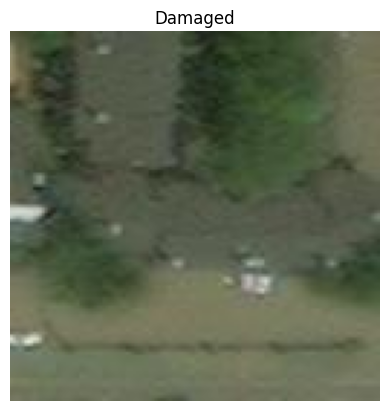

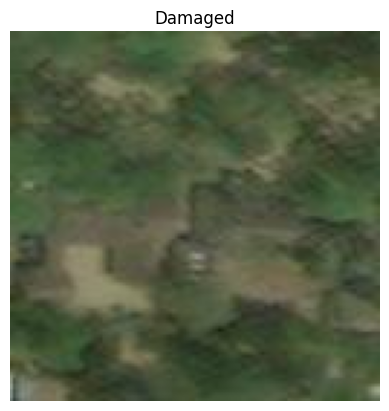

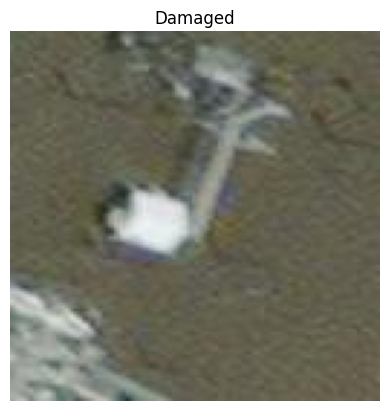

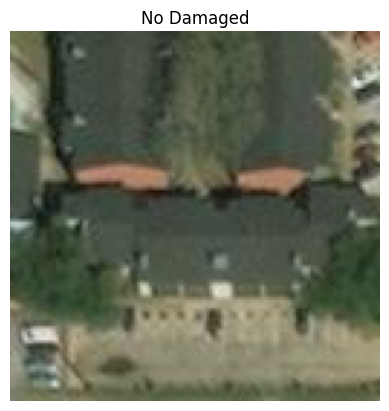

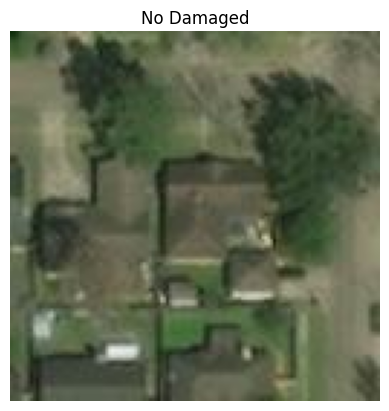

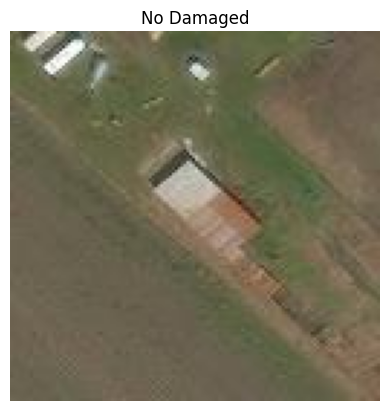

In [6]:
damage_count = 0
no_damage_count = 0
# Iterate over the dataset
for i in range(len(y)):
    label = y[i]
    if label == 1  and damage_count <3:
        # Display the image for the "damaged" class
        plt.imshow(x[i])
        plt.title('Damaged')
        plt.axis('off')
        plt.show()
        damage_count += 1
    elif label == 0 and no_damage_count < 3:
        # Display the image for the "no-damaged" class
        plt.imshow(x[i])
        plt.title('No Damaged')
        plt.axis('off')
        plt.show()
        no_damage_count += 1
    if damage_count == 3 and no_damage_count == 3:
        # Break out of the loop once the desired number of samples for each class is displayed
        break

In [7]:
# Create an instance of SMOTE
smote = SMOTE()

# Resample the dataset
x1, y1 = smote.fit_resample(x.reshape(x.shape[0], -1), y)

# Reshape x1 back to its original shape
x1 = x1.reshape(x1.shape[0], x.shape[1], x.shape[2], x.shape[3])

# Check the new shape of x_resampled and y_resampled
print("Shape of x1:", x1.shape)
print("Shape of y1:", y1.shape)


Shape of x1: (28042, 128, 128, 3)
Shape of y1: (28042,)


In [8]:
unique_classes, class_counts = np.unique(y, return_counts=True)
print(unique_classes)
print(class_counts)

[0 1]
[ 7036 14021]


In [9]:
unique_classes1, class_counts1 = np.unique(y1, return_counts=True)
print(unique_classes1)
print(class_counts1)

[0 1]
[14021 14021]


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=42)
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [11]:
# from sklearn.preprocessing import StandardScaler
# scaler1 = StandardScaler()
# x_train = scaler1.fit_transform(x_train)
# x_test = scaler1.transform(x_test)

In [ ]:
# Reshape x_train and x_test to 2D arrays
num_train, height, width, channels = x_train.shape
x_train_2d = x_train.reshape(num_train, height * width * channels)
num_test, _, _, _ = x_test.shape
x_test_2d = x_test.reshape(num_test, height * width * channels)
# Apply MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train_2d)
x_test_scaled = scaler.transform(x_test_2d)
# Reshape the scaled data back to 4D arrays
x_train_scaled = x_train_scaled.reshape(num_train, height, width, channels)
x_test_scaled = x_test_scaled.reshape(num_test, height, width, channels)


In [1]:
# Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['log2', 'sqrt']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=10)
grid_search.fit(x_train_scaled, y_train)

best_params = grid_search.best_params_



NameError: name 'GridSearchCV' is not defined